In [1]:
# suppress warnings
import sys, os, warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# also suppress warnings of parallel processes such as grid search cv
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [2]:
import os
from os import path

import pandas as pd
import numpy as np 
import seaborn.apionly as sns
import matplotlib.pyplot as plt

from dython.nominal import associations

In [3]:
df = pd.read_csv('dataset/csv/data.csv', encoding='utf8')

In [4]:
df['Race'][df['Race'] == 'American Indian/Alaskan Native'] = 'American'

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.shape

(319795, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [11]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [12]:
categorical_columns = df.select_dtypes(exclude=['float64']).columns

for col in categorical_columns:
    col = df[col]
    df_col = pd.concat([col.value_counts(normalize=True), col.value_counts()], axis=1)
    print(df_col)
    print()

     HeartDisease  HeartDisease
No       0.914405        292422
Yes      0.085595         27373

      Smoking  Smoking
No   0.587523   187887
Yes  0.412477   131908

     AlcoholDrinking  AlcoholDrinking
No          0.931903           298018
Yes         0.068097            21777

      Stroke  Stroke
No   0.96226  307726
Yes  0.03774   12069

     DiffWalking  DiffWalking
No       0.86113       275385
Yes      0.13887        44410

             Sex     Sex
Female  0.524727  167805
Male    0.475273  151990

             AgeCategory  AgeCategory
65-69           0.106790        34151
60-64           0.105336        33686
70-74           0.097140        31065
55-59           0.093050        29757
50-54           0.079370        25382
80 or older     0.075527        24153
45-49           0.068141        21791
75-79           0.067174        21482
18-24           0.065867        21064
40-44           0.065686        21006
35-39           0.064260        20550
30-34           0.058641       

In [13]:
def reset(font_scale=1.5):
    sns.set(font_scale=font_scale)
    
    colors = ["#1d84b5", "#b288c0", "#091540", "#f6ae2d", "#49A078"]
    
    sns.set_palette(sns.color_palette(colors))
    
    sns.set_style("ticks")    

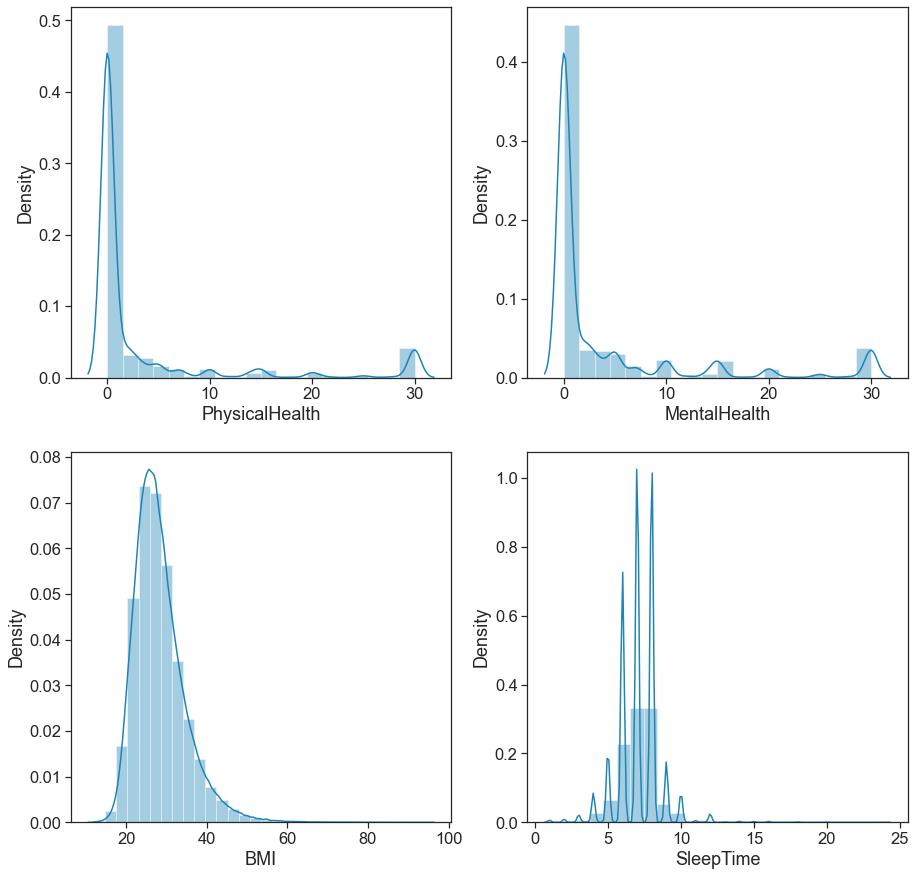

In [14]:
reset()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
sns.distplot(ax=ax1, a=df['PhysicalHealth'], kde=True, bins=20, hist=True)
sns.distplot(ax=ax2, a=df['MentalHealth'], kde=True, bins=20, hist=True)
sns.distplot(ax=ax3, a=df['BMI'], kde=True, bins=30, hist=True)
sns.distplot(ax=ax4, a=df['SleepTime'], kde=True, bins=25, hist=True)
plt.show()

fig.savefig('figures/numeric_dists.pdf')

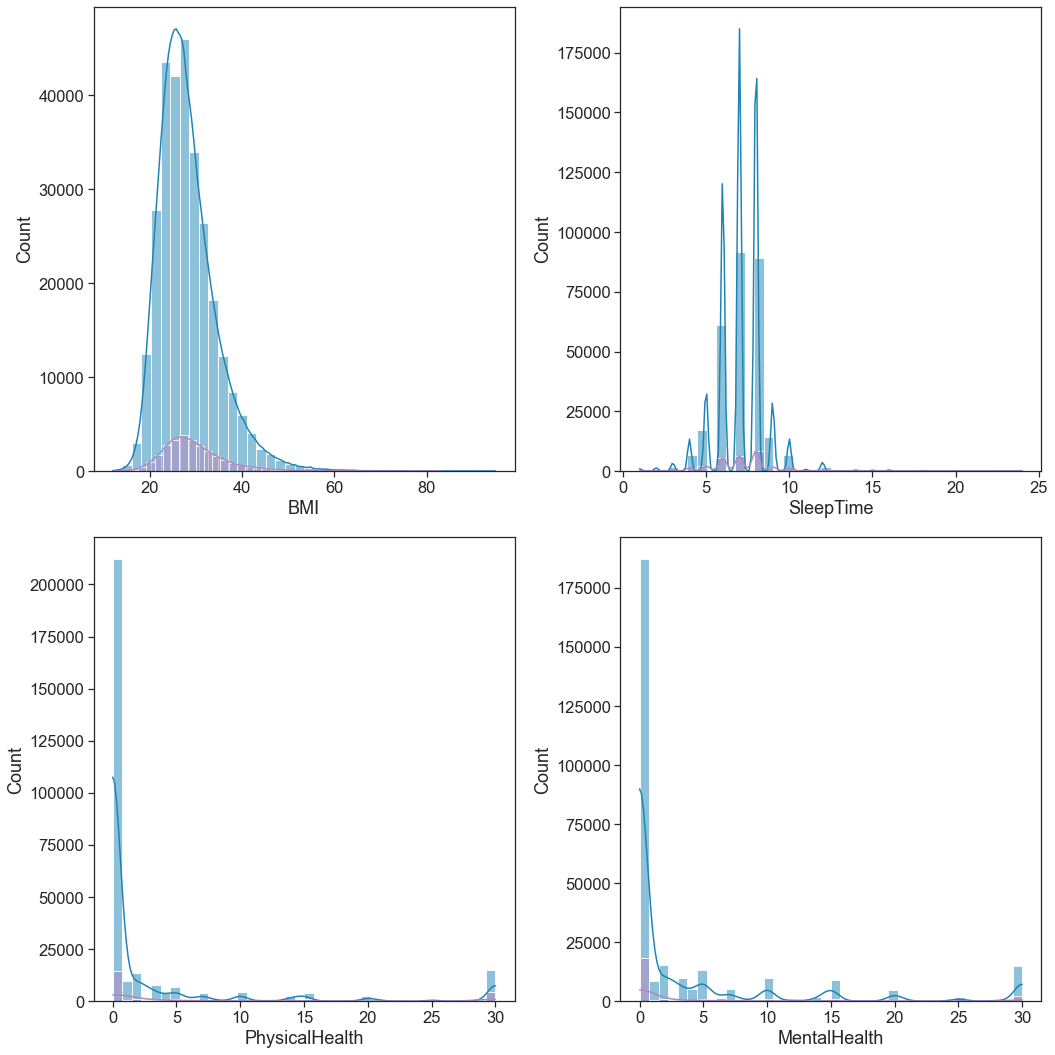

In [35]:
reset()

df_hd_yes = df[df['HeartDisease'] == 'Yes']
df_hd_no = df[df['HeartDisease'] == 'No']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))

axes = [ax1, ax2, ax3, ax4]
bins = [40, 40, 40, 40]
cats = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth']
c_bar = ["#1D84B5", "#B288C0"]
c_line = ["#1D84B5", "#B288C0"]

for ax, x, b in zip(axes, cats, bins):
    sns.histplot(ax=ax, x=x, data=df_hd_no, kde=True, bins=b, color=c_bar[0])
    sns.histplot(ax=ax, x=x, data=df_hd_yes, kde=True, bins=b, color=c_bar[1]) 

    ax.lines[0].set_color(c_line[0])
    ax.lines[1].set_color(c_line[1])

plt.tight_layout()
    
plt.show()
fig.savefig('figures/numeric_dists_hue.pdf')

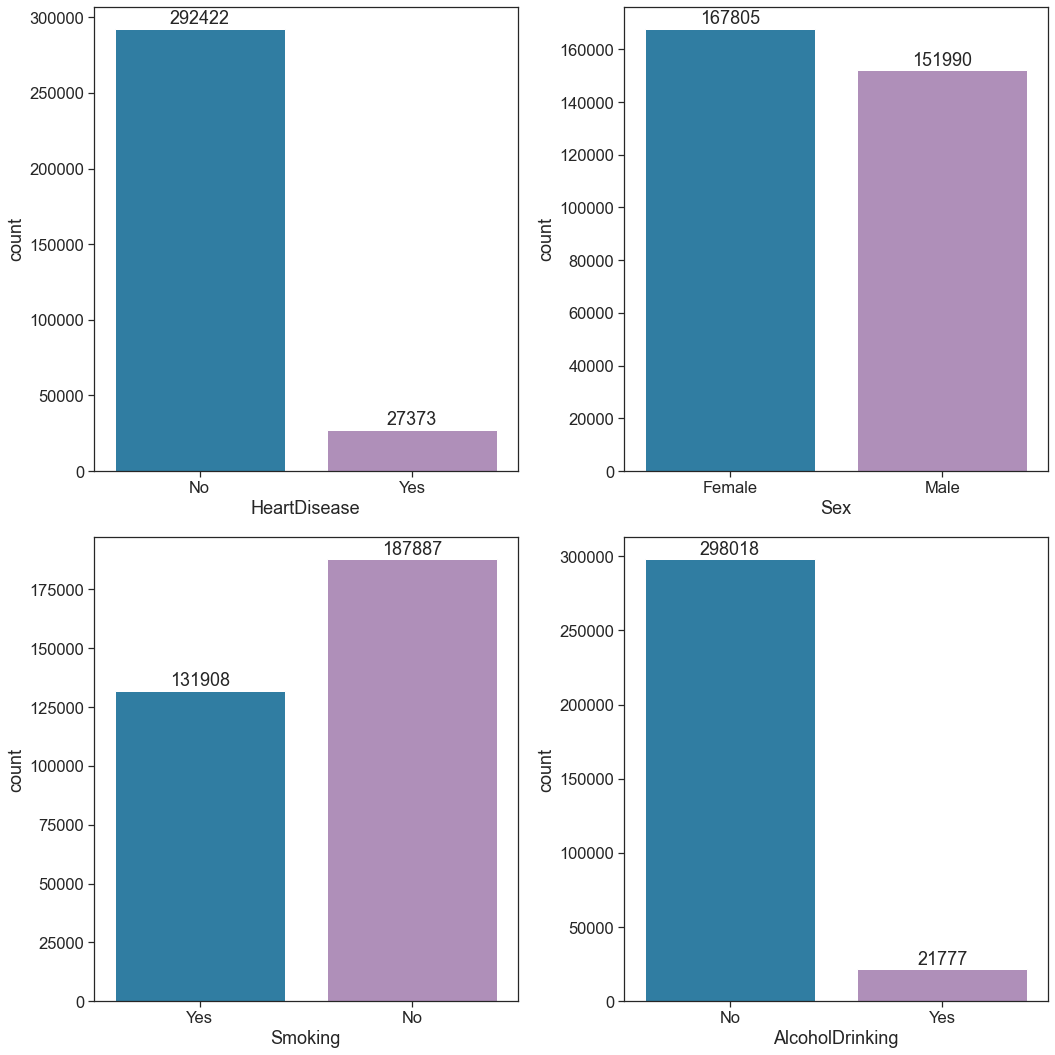

In [16]:
reset()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
sns.countplot(ax=ax1, data=df, x='HeartDisease')
sns.countplot(ax=ax2, data=df, x='Sex')
sns.countplot(ax=ax3, data=df, x='Smoking')
sns.countplot(ax=ax4, data=df, x='AlcoholDrinking')

plt.tight_layout()

for ax in [ax1, ax2, ax3, ax4]:
    for p in ax.patches:
        ax.annotate(
            np.round(p.get_height(), decimals=2), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.savefig('figures/nums_by_cats.pdf')
plt.show()

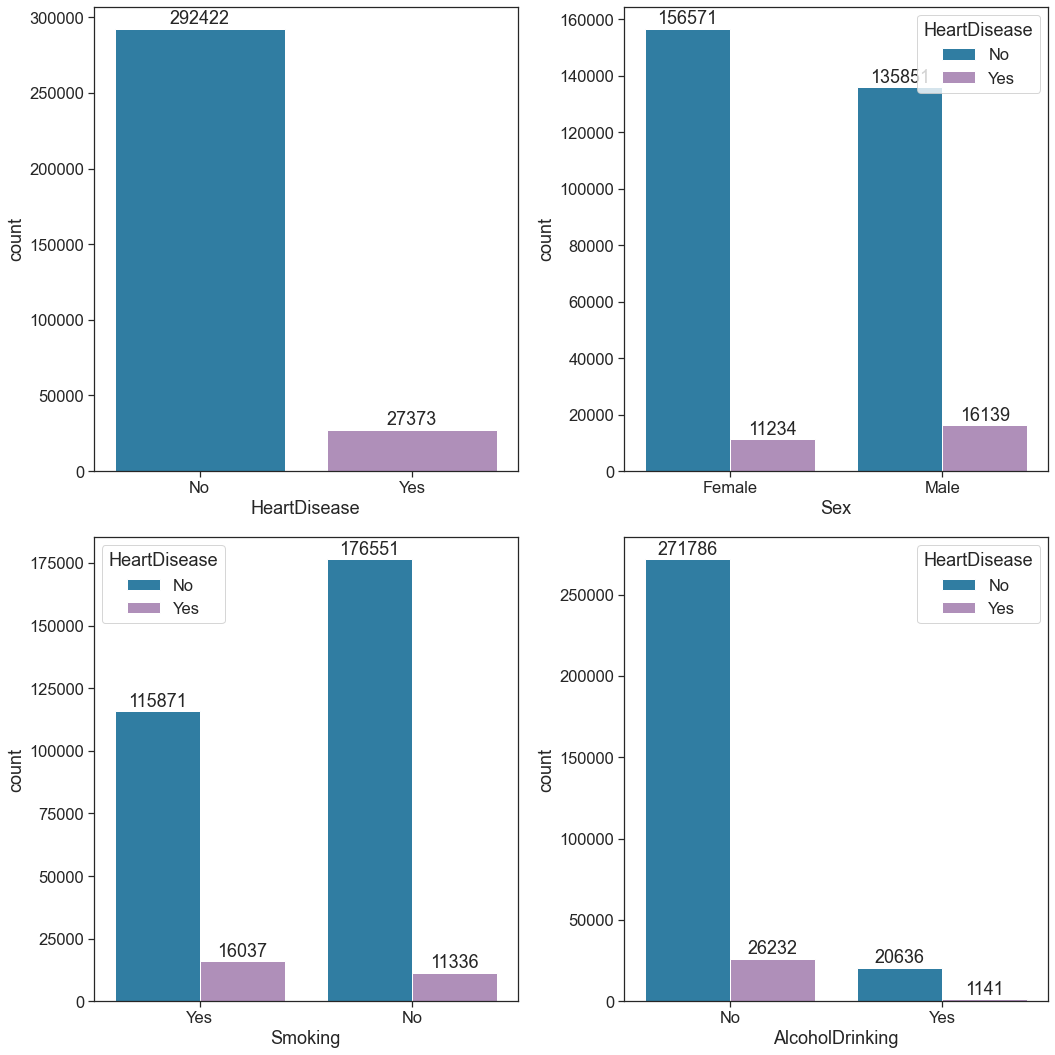

In [17]:
reset()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
sns.countplot(ax=ax1, data=df, x='HeartDisease')
sns.countplot(ax=ax2, data=df, x='Sex', hue='HeartDisease')
sns.countplot(ax=ax3, data=df, x='Smoking', hue='HeartDisease')
sns.countplot(ax=ax4, data=df, x='AlcoholDrinking', hue='HeartDisease')

plt.tight_layout()

for ax in [ax1, ax2, ax3, ax4]:
    for p in ax.patches:
        ax.annotate(
            np.round(p.get_height(), decimals=2), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.savefig('figures/nums_by_cats_dodged.pdf')
plt.show()

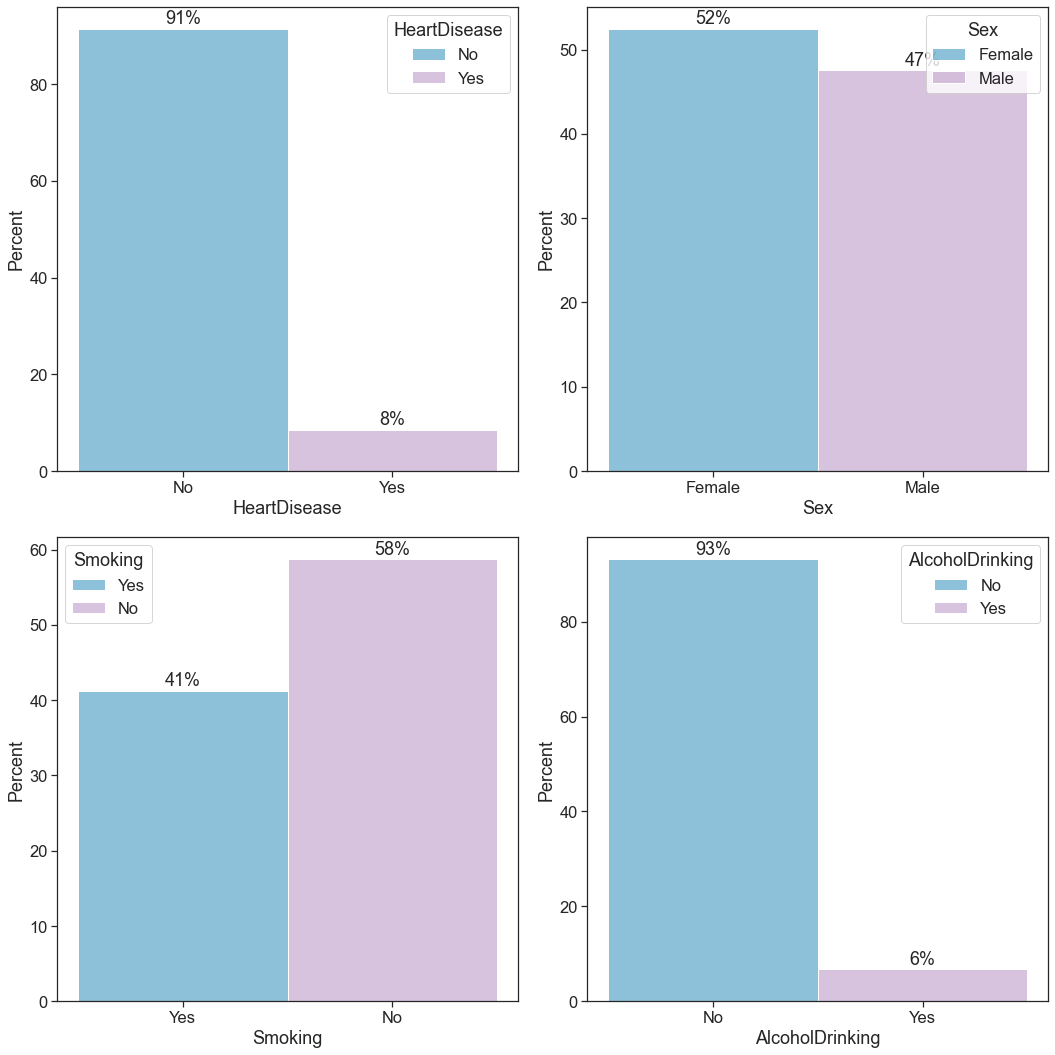

In [18]:
reset()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
sns.histplot(ax=ax1, data=df, x='HeartDisease', hue='HeartDisease', stat='percent')
sns.histplot(ax=ax2, data=df, x='Sex', hue='Sex', stat='percent')
sns.histplot(ax=ax3, data=df, x='Smoking', hue='Smoking', stat='percent')
sns.histplot(ax=ax4, data=df, x='AlcoholDrinking', hue='AlcoholDrinking', stat='percent')

plt.tight_layout()

for ax in [ax1, ax2, ax3, ax4]:
    for p in ax.patches:
        val = int(np.round(p.get_height(), decimals=2))
        if val > 0:
            ax.annotate(f'{val}%', (p.get_x()+p.get_width()/2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.savefig('figures/percents_of_cats.pdf')
plt.show()

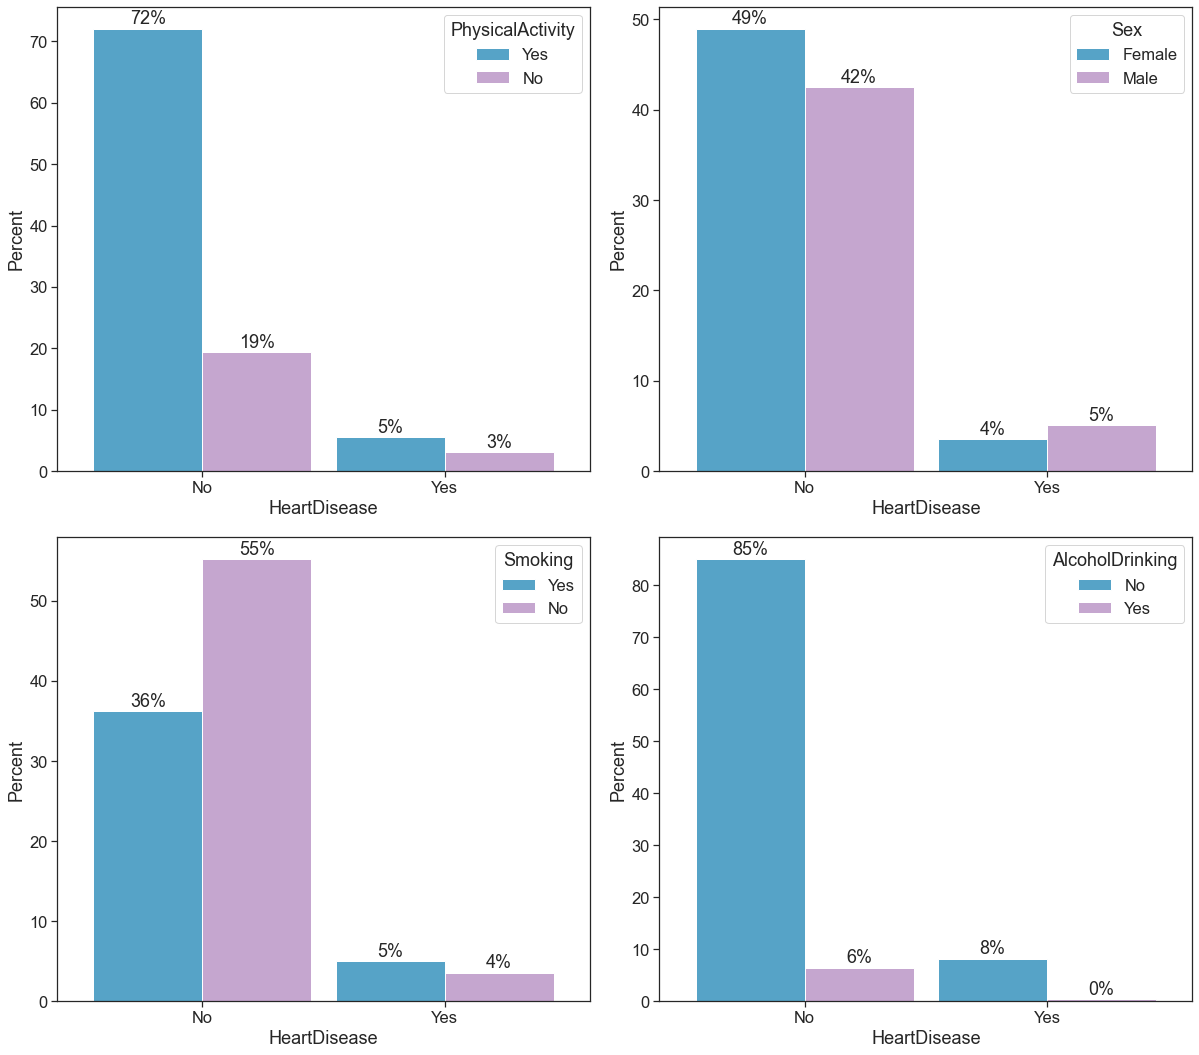

In [19]:
reset()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(17,15))
sns.histplot(ax=ax1, data=df, x='HeartDisease', hue='PhysicalActivity', multiple='dodge', stat='percent')
sns.histplot(ax=ax2, data=df, x='HeartDisease', hue='Sex', multiple='dodge', stat='percent')
sns.histplot(ax=ax3, data=df, x='HeartDisease', hue='Smoking', multiple='dodge', stat='percent')
sns.histplot(ax=ax4, data=df, x='HeartDisease', hue='AlcoholDrinking', multiple='dodge', stat='percent')

plt.tight_layout()

for ax in [ax1, ax2, ax3, ax4]:
    for i, p in enumerate(ax.patches):
        width = 0.45
        current_width = p.get_width()
        diff = current_width - width
        p.set_width(width)
        
        if i >= 2:
            p.set_x(p.get_x() + abs(diff))
            
        ax.annotate(f'{int(np.round(p.get_height(), decimals=0))}%', (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.savefig('figures/percents_by_cats.pdf')
plt.show()

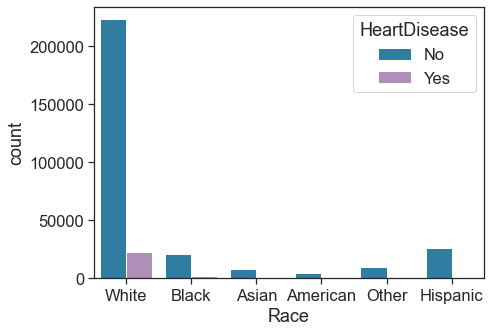

In [20]:
reset()

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Race", hue='HeartDisease')

plt.savefig('figures/race.pdf')

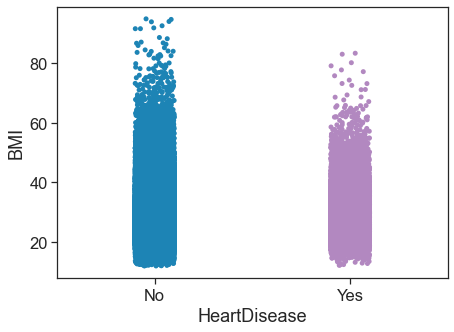

In [43]:
reset()

plt.figure(figsize=(7,5))
sns.stripplot(data=df, x='HeartDisease', y='BMI')

plt.savefig('figures/bmi_strip.png')

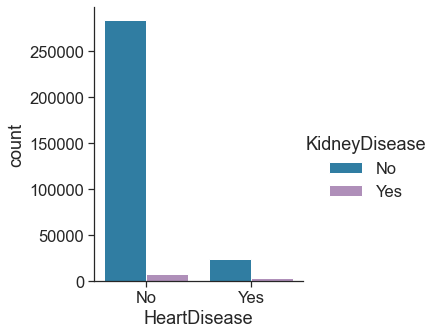

In [22]:
reset()

sns.catplot(x="HeartDisease", hue="KidneyDisease", data=df, kind="count", height=5, aspect=1.0);

plt.savefig('figures/kidney.pdf')

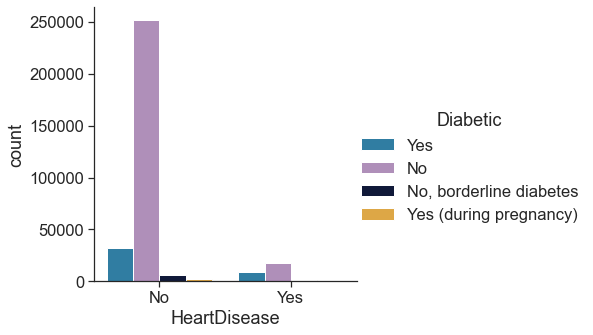

In [23]:
reset()

sns.catplot(x="HeartDisease", hue="Diabetic", data=df, kind="count", height=5, aspect=1.2);

plt.savefig('figures/diabetic.pdf')

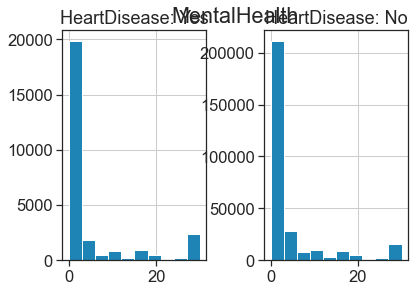

In [24]:
reset()

by = "MentalHealth"

plt.figure(figsize=(7,5))
fig, ax = plt.subplots(1,2)
df[df["HeartDisease"] == "Yes"][by].hist(ax=ax[0])
ax[0].set_title('HeartDisease: Yes')
df[df["HeartDisease"] == "No"][by].hist(ax=ax[1])
ax[1].set_title('HeartDisease: No')
plt.suptitle(by)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('figures/mental.pdf')

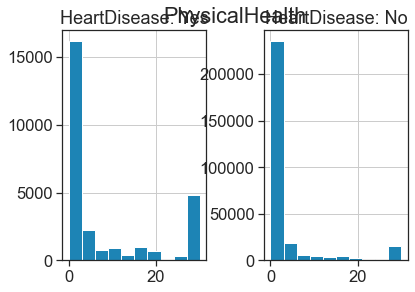

In [25]:
reset()

by = "PhysicalHealth"

fig, ax = plt.subplots(1,2)
df[df["HeartDisease"] == "Yes"][by].hist(ax=ax[0])
ax[0].set_title('HeartDisease: Yes')
df[df["HeartDisease"] == "No"][by].hist(ax=ax[1])
ax[1].set_title('HeartDisease: No')
plt.suptitle(by)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('figures/physical.pdf')

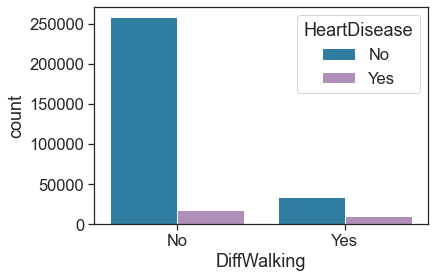

In [26]:
reset()

sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')

plt.savefig('figures/diffwalking.pdf')

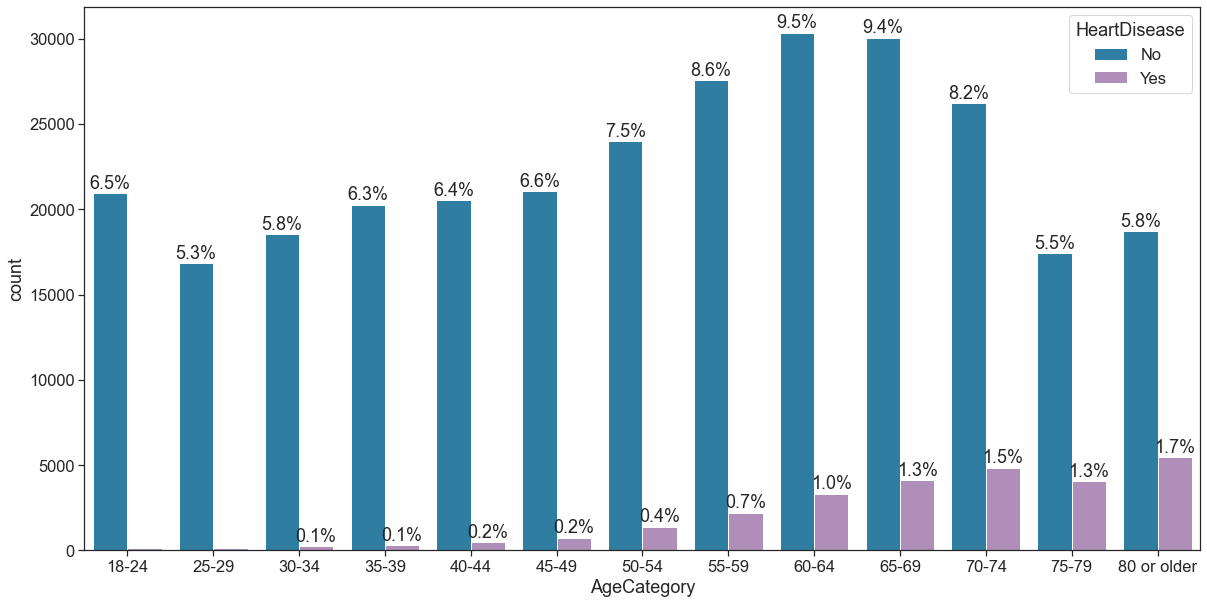

In [34]:
reset()

order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', order=order)

for p in ax.patches:
    val = np.round(p.get_height() / len(df) * 100, decimals=1)
    if val > 0:
        ax.annotate(f'{val}%', (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('figures/age_heart.pdf')

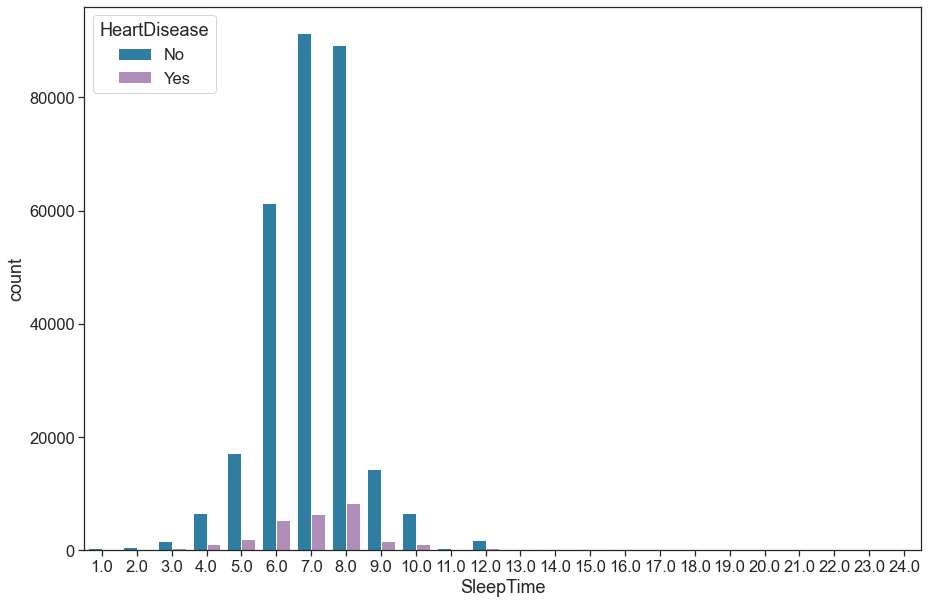

In [28]:
reset()

plt.figure(figsize=(15,10))
ax = sns.countplot(data=df, x='SleepTime', hue='HeartDisease')

plt.savefig('figures/sleeptime_heart.pdf')

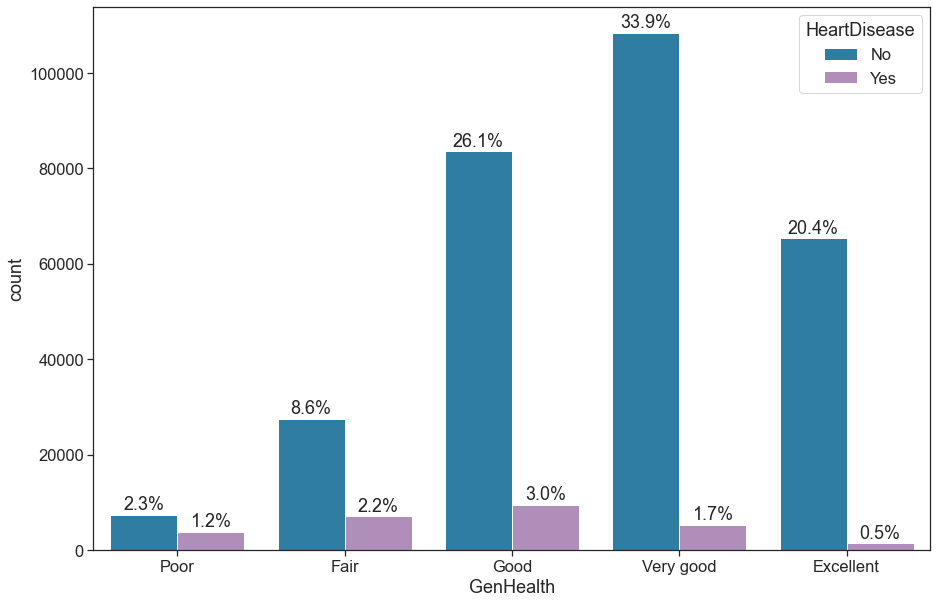

In [29]:
reset()

order = ['Poor', 'Fair' ,'Good', 'Very good','Excellent']

plt.figure(figsize=(15,10))
ax = sns.countplot(data=df, x='GenHealth', hue='HeartDisease', order=order)

for p in ax.patches:
    val = np.round(p.get_height() / len(df) * 100, decimals=1)
    if val > 0:
        ax.annotate(f'{val}%', (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('figures/gen_heart.pdf')

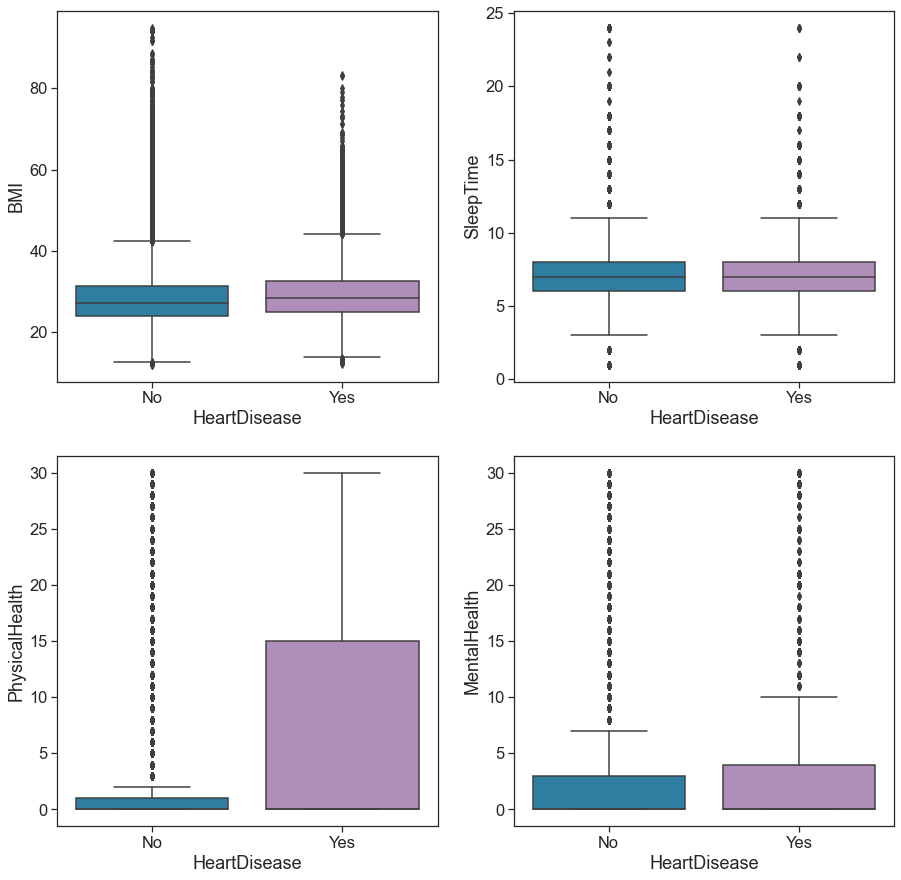

In [44]:
reset()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,15))
sns.boxplot(ax=ax1, data=df, x='HeartDisease', y='BMI')
sns.boxplot(ax=ax2, data=df, x='HeartDisease', y='SleepTime')
sns.boxplot(ax=ax3, data=df, x='HeartDisease', y='PhysicalHealth')
sns.boxplot(ax=ax4, data=df, x='HeartDisease', y='MentalHealth')
plt.show()

fig.savefig('figures/boxplots.png')

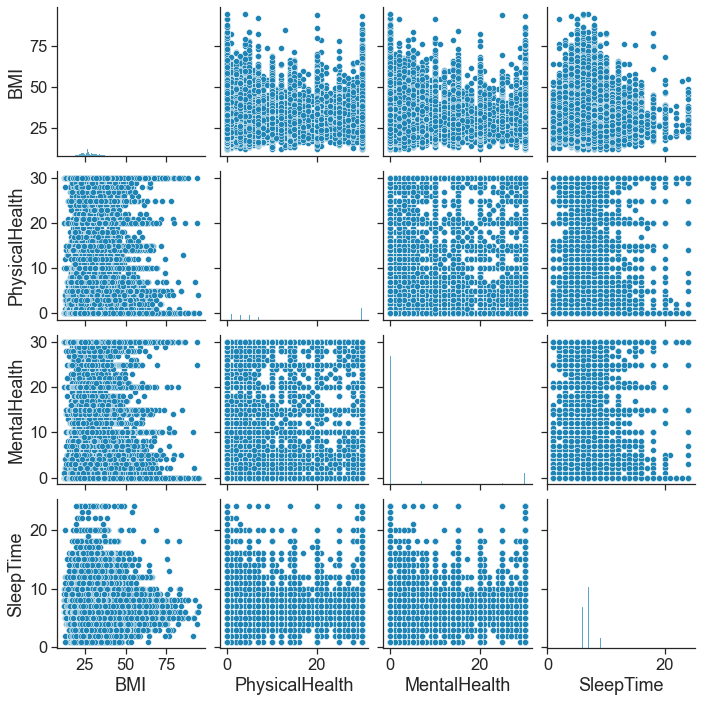

In [42]:
reset()

sns.pairplot(df)

plt.savefig('figures/pairplot.png')

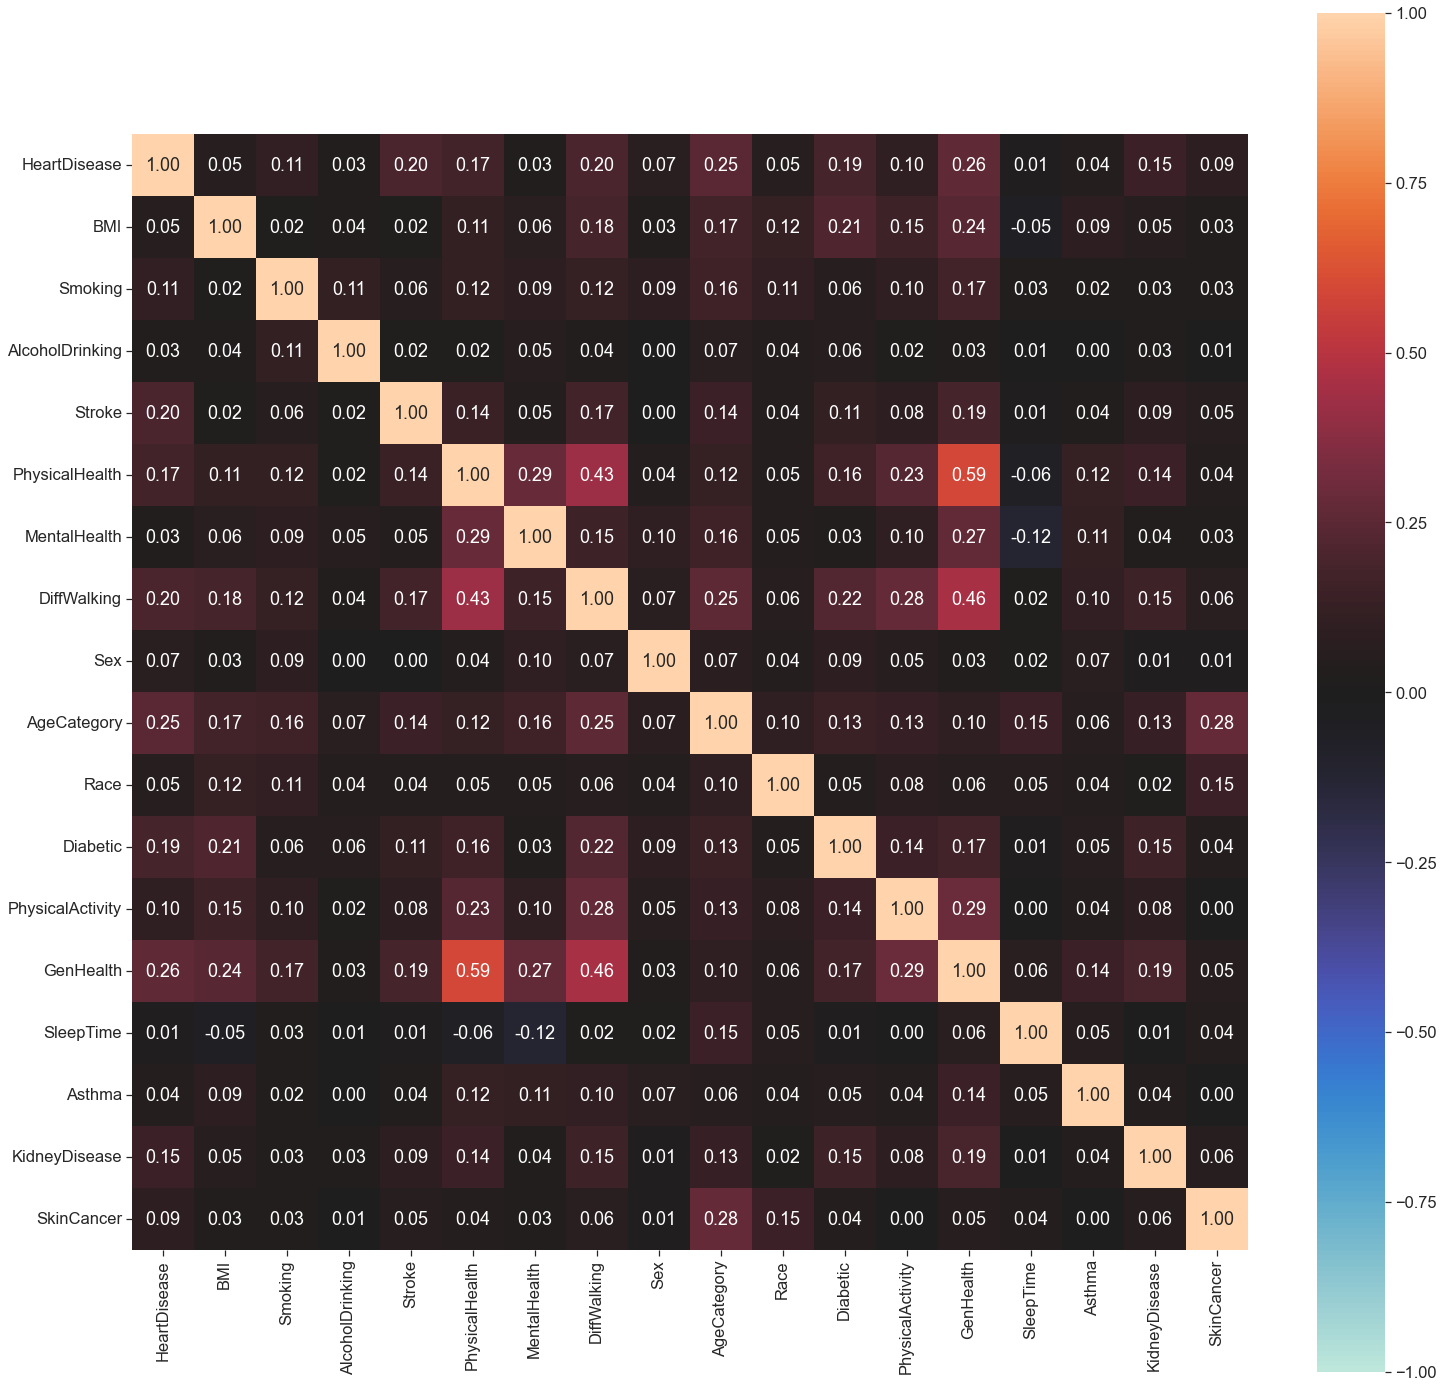

In [32]:
corr = associations(df, figsize=(25, 25), filename='figures/correlation.pdf')